In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
### Input file - Train file path change if require
df = pd.read_csv("D:/Personal/indix/train.csv")

In [3]:
### See top row of Input DataFrame
df.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


train.head()

#### Data View 

In [4]:
df.shape

(603201, 5)

In [5]:
### Summary of train dataset
df.describe()

,storeId,url,additionalAttributes,breadcrumbs,label
count,213951,213951,213951,599800,603201
unique,166,201510,199742,63126,4
top,22,https://www.walmart.com/ip/At-Home-Bonus-Track...,Country of Origin=United States,books,rest
freq,48000,6,405,16039,389250


In [6]:
## checking the nan value in data set- trian
df.isnull().any()

storeId                  True
url                      True
additionalAttributes     True
breadcrumbs              True
label                   False
dtype: bool

In [7]:
## Checking the duplicate values in ['breadcrumbs', 'lebel']
df.duplicated().any()

True

### Data Cleaning- making structure data for model prediction
By doing this the change of overfitting will be reduced.

In [8]:
## Drop all Na values- As will train baise the model
struct_df = df.dropna()

In [9]:
## cross checkig for na values in train data set
struct_df.isnull().any()

storeId                 False
url                     False
additionalAttributes    False
breadcrumbs             False
label                   False
dtype: bool

In [10]:
struct_df.shape

(210550, 5)

The original data has sahpe (603201, 5) and after removing the Null from all columns the size has been reduced to 88%.
So need to romve the only columns having null values which are going to be used as the train features.

In [11]:
struct_df = df.dropna(subset = ['breadcrumbs', 'label'])

In [12]:
struct_df.shape

(599800, 5)

In [13]:
## Removing duplicate in the columns ['breadcrumbs', 'label']
struct_df.duplicated().any()

True

In [14]:
struct_df = struct_df.drop_duplicates(subset = ['breadcrumbs', 'label'])

In [15]:
struct_df.shape

(63126, 5)

So after removal of <NULL> and Duplicate- we have 63126 unique entries for 'train' data

In [16]:
## 
struct_df.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


In [17]:
## Calling packeges for split the Dataframe into Train and Test
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(struct_df, test_size=0.2) ## It will split the dataset into ~80% train and ~20% test

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
count_vect = CountVectorizer()

In [21]:
X_train_counts = count_vect.fit_transform(train.breadcrumbs.values.astype('U'))

In [22]:
X_train_counts.shape

(50500, 16547)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tfidf_transformer = TfidfTransformer()

In [25]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [26]:
X_train_tfidf.shape

(50500, 16547)

## Running ML Algorithm

### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
clf = MultinomialNB().fit(X_train_tfidf, train.label)

#### Building a Pipeline: To reduce the Code size

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

In [31]:
text_clf = text_clf.fit(train.breadcrumbs, train.label)

### 1. Performance of  NB Classifier

In [32]:
import numpy as np

In [33]:
test.head()

,storeId,url,additionalAttributes,breadcrumbs,label
157943,NaN,NaN,NaN,sports & outdoors > outdoor recreation > outdo...,rest
100491,NaN,NaN,NaN,online shopping > electronics > home thea...,rest
113905,NaN,NaN,NaN,home & kitchen > kitchen & dining > bakeware >...,rest
21549,23,http://www.walmart.com/ip/35175793,Duration=408;Original Languages=English;Record...,movies & tv > movies > horror > classics,videos
333714,NaN,NaN,NaN,industrial & scientific > retail store fixture...,rest


In [34]:
predicted = text_clf.predict(test.breadcrumbs)

In [35]:
len(predicted)

12626

In [36]:
np.mean(predicted == test.label)

0.98012038650403932

### Cross-validation 

In [39]:
from sklearn.cross_validation import cross_val_score

In [40]:
cross_val_score(text_clf, struct_df.breadcrumbs, struct_df.label, cv=10, scoring='accuracy').mean()

0.98103767445184842

In [41]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [42]:
clf_report = classification_report(predicted, test.label)
print(clf_report)

             precision    recall  f1-score   support

      books       0.95      1.00      0.97      3602
      music       0.96      1.00      0.98       938
       rest       1.00      0.97      0.99      6774
     videos       0.99      0.97      0.98      1312

avg / total       0.98      0.98      0.98     12626



In [43]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    return plt.show()

[0.95, 1.0, 0.97]
[0.96, 1.0, 0.98]
[1.0, 0.97, 0.99]
[0.99, 0.97, 0.98]


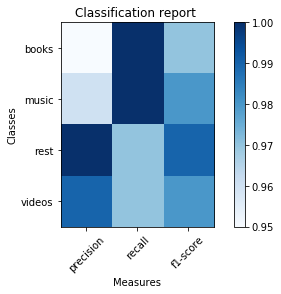

In [44]:
plot_classification_report(clf_report)

In [66]:
import seaborn as sns

In [67]:
def heatmap_actual_predicted(data_frame):
    """
    Default heatmap for this problem.
    : Here 5x5 matrix result is there.
    : The digonal line will be present the correct result.
    : ftm : to change the number format-by default scientific notation(exponential)
    """
    Index= ['Predicted Breadcrumbs', 'books', 'music', 'rest', 'videos']
    Cols = ['Actual BreadCrumbs', 'books', 'music', 'rest', 'videos']
    df = pd.DataFrame(abs(np.random.randn(5, 5)), index=Index, columns=Cols)

    ax = sns.heatmap(data_frame, annot=True, fmt='g', cmap='Blues')
    return plt.show(ax)

In [68]:
df_nb = pd.crosstab(test.label, predicted, rownames=['Actual Breadcrumbs'], colnames=['Predicted breadcrumbs'])

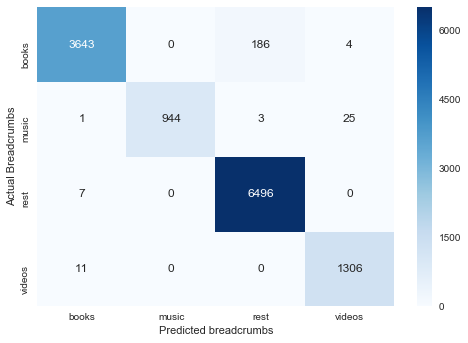

In [69]:
heatmap_actual_predicted(df_nb)

#### 2. Support Vector Machines (SVM)

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, n_iter=5, random_state=42)),])

In [47]:
text_clf_svm= text_clf_svm.fit(train.breadcrumbs, train.label)

In [48]:
predicted_svm = text_clf_svm.predict(test.breadcrumbs)

In [49]:
np.mean(predicted_svm == test.label)

0.99192143196578486

### Using Cross-validation

In [51]:
cross_val_score(text_clf_svm, struct_df.breadcrumbs, struct_df.label, cv=10, scoring='accuracy').mean()

0.99298246269782742

In [52]:
df_svm = pd.crosstab(test.label, predicted_svm, rownames=['Actual Breadcrumbs'], colnames=['Predicted breadcrumbs'])

In [53]:
clf_report_svm = classification_report(predicted_svm, test.label)
print clf_report_svm

             precision    recall  f1-score   support

      books       0.99      0.99      0.99      3803
      music       0.96      1.00      0.98       936
       rest       1.00      1.00      1.00      6587
     videos       0.99      0.97      0.98      1300

avg / total       0.99      0.99      0.99     12626



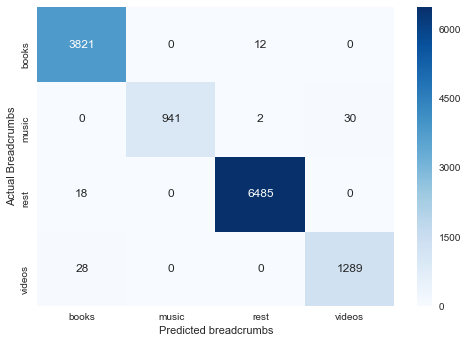

In [72]:
heatmap_actual_predicted(df_svm)

[0.99, 0.99, 0.99]
[0.96, 1.0, 0.98]
[1.0, 1.0, 1.0]
[0.99, 0.97, 0.98]


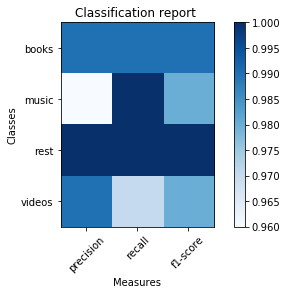

In [54]:
plot_classification_report(clf_report_svm)

#### Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
## vect_ngram_range : use unigram and bigram and choose the one
##which is optimal
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),}

In [57]:
### n_jobs = -1 --> use multiple cores from user machine
### Using text_clf from Naive Bayes
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [58]:
gs_clf = gs_clf.fit(train.breadcrumbs, train.label)

In [59]:
predicted_gs = gs_clf.predict(test.breadcrumbs)

In [60]:
np.mean(predicted_gs == test.label)

0.98550609852684934

### Using Cross-validation

In [61]:
cross_val_score(gs_clf, struct_df.breadcrumbs, struct_df.label, cv=10, scoring='accuracy').mean()

0.98561568799674215

In [73]:
df_gs = pd.crosstab(test.label, predicted_gs, rownames=['Actual Breadcrumbs'], colnames=['Predicted breadcrumbs'])

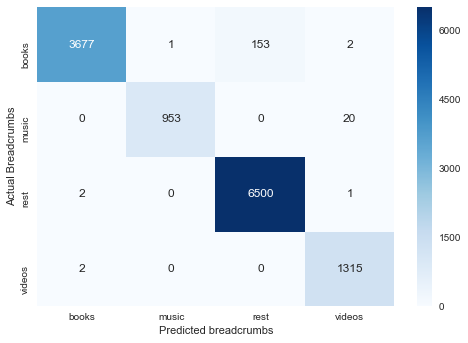

In [74]:
heatmap_actual_predicted(df_gs)

In [56]:
clf_report_gs = classification_report(predicted_gs, test.label) 
print clf_report_gs

             precision    recall  f1-score   support

      books       0.96      1.00      0.98      3681
      music       0.98      1.00      0.99       954
       rest       1.00      0.98      0.99      6653
     videos       1.00      0.98      0.99      1338

avg / total       0.99      0.99      0.99     12626



[0.96, 1.0, 0.98]
[0.98, 1.0, 0.99]
[1.0, 0.98, 0.99]
[1.0, 0.98, 0.99]


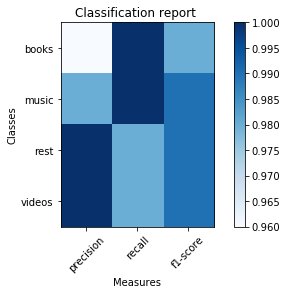

In [57]:
plot_classification_report(clf_report_gs)

##### RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
text_clf_rf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('rf', RandomForestClassifier(n_estimators=500)),])

In [60]:
text_clf_rf = text_clf_rf.fit(train.breadcrumbs, train.label)

In [61]:
predicted_rf = text_clf_rf.predict(test.breadcrumbs)

In [62]:
np.mean(predicted_rf == test.label)

0.99841596705211466

In [75]:
df_rf = pd.crosstab(test.label, predicted_rf, rownames=['Actual BreadCrumbs'], colnames = ['Predicted Breadcrumbs'])

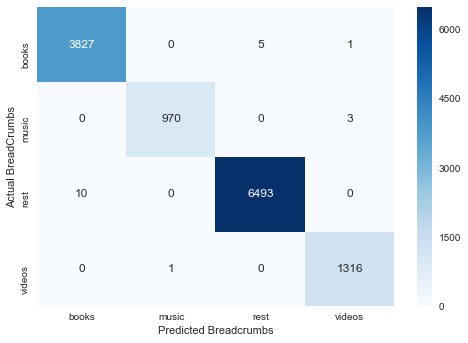

In [76]:
heatmap_actual_predicted(df_rf)

In [64]:
clf_report_rf = classification_report(predicted_rf, test.label)

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


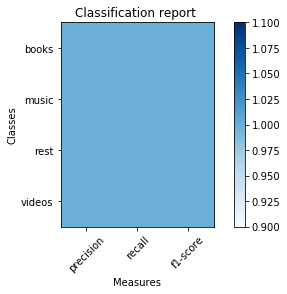

In [65]:
plot_classification_report(clf_report_rf)

## It is clear from here that Random forest is performing well on this data set.